# LifeSync Project - Data Preprocessing

This notebook focuses on the data preprocessing steps for the LifeSync project. We'll clean and process the raw lifestyle dataset, documenting the steps thoroughly before saving the cleaned data for model training.

## Steps:
1. Load and explore the raw dataset
2. Check for and handle missing values
3. Detect and handle outliers
4. Normalize/standardize numerical features
5. Encode categorical variables
6. Visualize transformed data
7. Save cleaned dataset for model training

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set up paths
os.makedirs('../outputs/data', exist_ok=True)

# Set random seed for reproducibility
np.random.seed(42)

# Configure plot styles
plt.style.use('seaborn-v0_8') 
sns.set_theme(style="whitegrid")
sns.set_palette('viridis')

## Step 1: Load and Explore the Raw Dataset

In [2]:
# Load the dataset
dataset_path = '../Mental_Health_Lifestyle_Dataset.csv'
df = pd.read_csv(dataset_path)

# Display basic information
print(f"Dataset dimensions: {df.shape} (rows, columns)")
print("\nFirst 5 rows of the dataset:")
df.head()

Dataset dimensions: (3000, 12) (rows, columns)

First 5 rows of the dataset:


,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,Low,Vegetarian,6.3,Low,NaN,21,4.0,7.8,6.5
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,Low,Vegetarian,7.2,High,NaN,43,4.7,9.6,9.7
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4


In [3]:
# Check data types and missing values
print("Data types:")
print(df.dtypes)
print("\nMissing values by column:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicate_count}")

Data types:
Country                         object
Age                              int64
Gender                          object
Exercise Level                  object
Diet Type                       object
Sleep Hours                    float64
Stress Level                    object
Mental Health Condition         object
Work Hours per Week              int64
Screen Time per Day (Hours)    float64
Social Interaction Score       float64
Happiness Score                float64
dtype: object

Missing values by column:
Country                          0
Age                              0
Gender                           0
Exercise Level                   0
Diet Type                        0
Sleep Hours                      0
Stress Level                     0
Mental Health Condition        595
Work Hours per Week              0
Screen Time per Day (Hours)      0
Social Interaction Score         0
Happiness Score                  0
dtype: int64

Total missing values: 595

Duplicate rows: 0


In [4]:
# Statistical summary of numerical features
df.describe()

,Age,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,41.229667,6.475933,39.466333,5.089833,5.470200,5.395067
std,13.428416,1.499866,11.451459,1.747231,2.563532,2.557601
min,18.000000,1.400000,20.000000,2.000000,1.000000,1.000000
25%,30.000000,5.500000,30.000000,3.600000,3.300000,3.200000
50%,41.000000,6.500000,39.000000,5.100000,5.500000,5.400000
75%,53.000000,7.500000,50.000000,6.600000,7.600000,7.500000
max,64.000000,11.300000,59.000000,8.000000,10.000000,10.000000


## Step 2: Analyze Categorical Variables


Country unique values:
Country
USA          446
Japan        439
Australia    434
India        434
Canada       428
Brazil       415
Germany      404
Name: count, dtype: int64


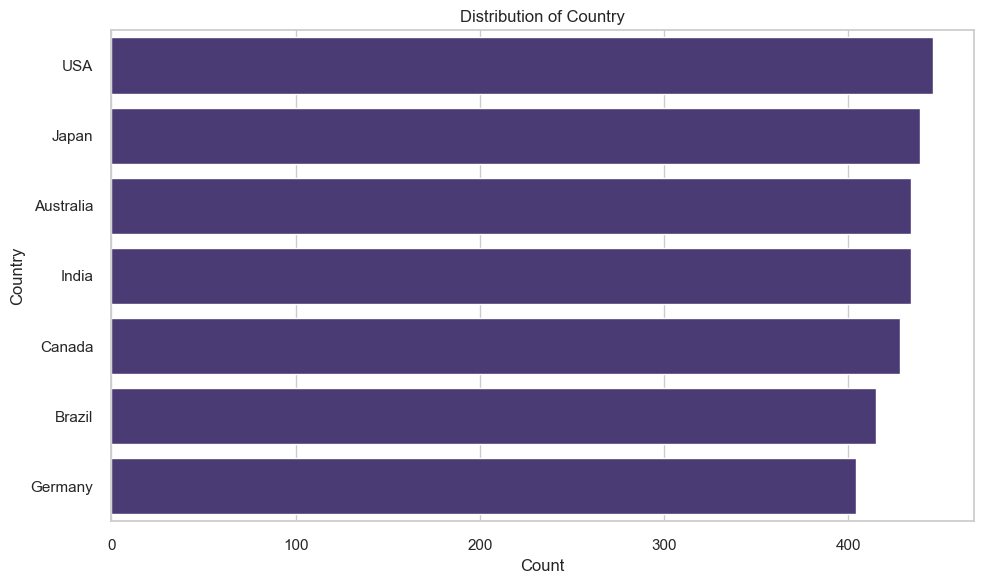


Gender unique values:
Gender
Female    1024
Other      996
Male       980
Name: count, dtype: int64


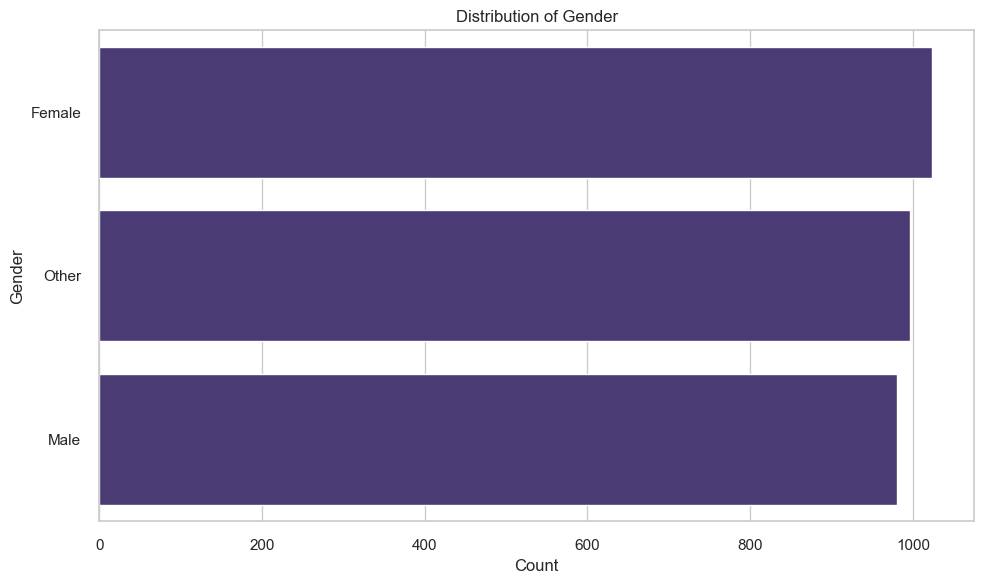


Exercise Level unique values:
Exercise Level
Low         1033
Moderate     998
High         969
Name: count, dtype: int64


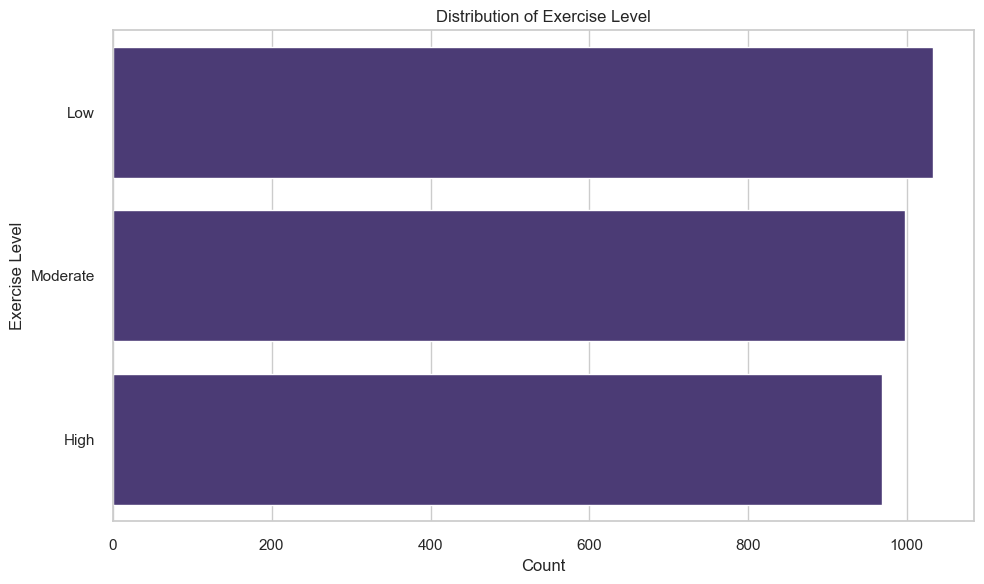


Diet Type unique values:
Diet Type
Junk Food     637
Balanced      625
Vegetarian    592
Vegan         573
Keto          573
Name: count, dtype: int64


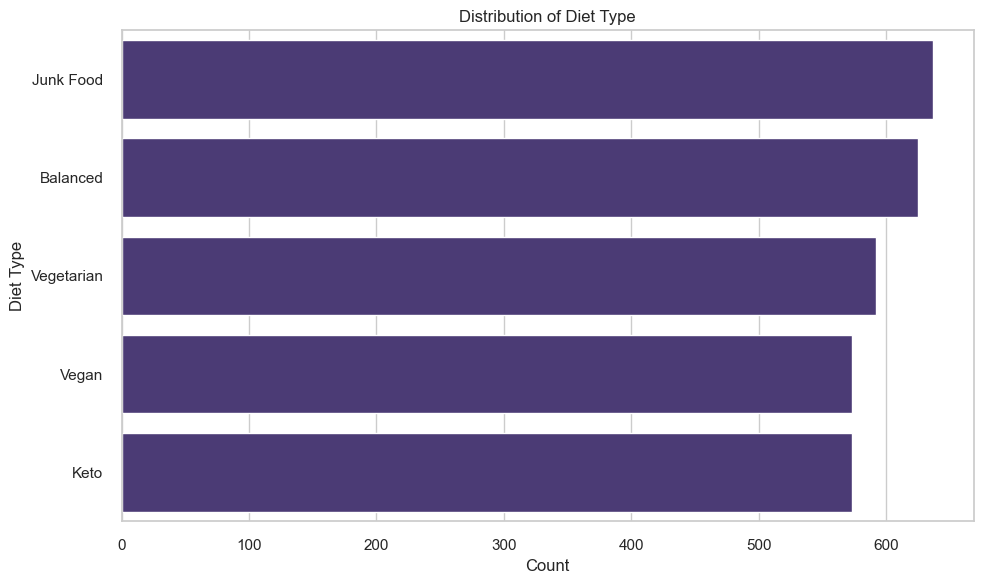


Stress Level unique values:
Stress Level
Low         1008
High        1002
Moderate     990
Name: count, dtype: int64


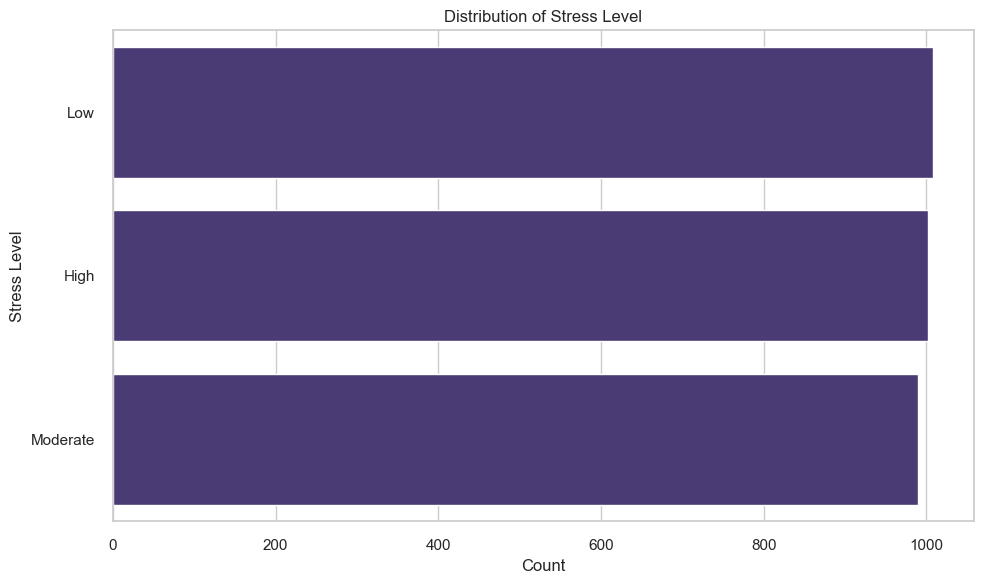


Mental Health Condition unique values:
Mental Health Condition
Anxiety       628
PTSD          624
Depression    580
Bipolar       573
Name: count, dtype: int64


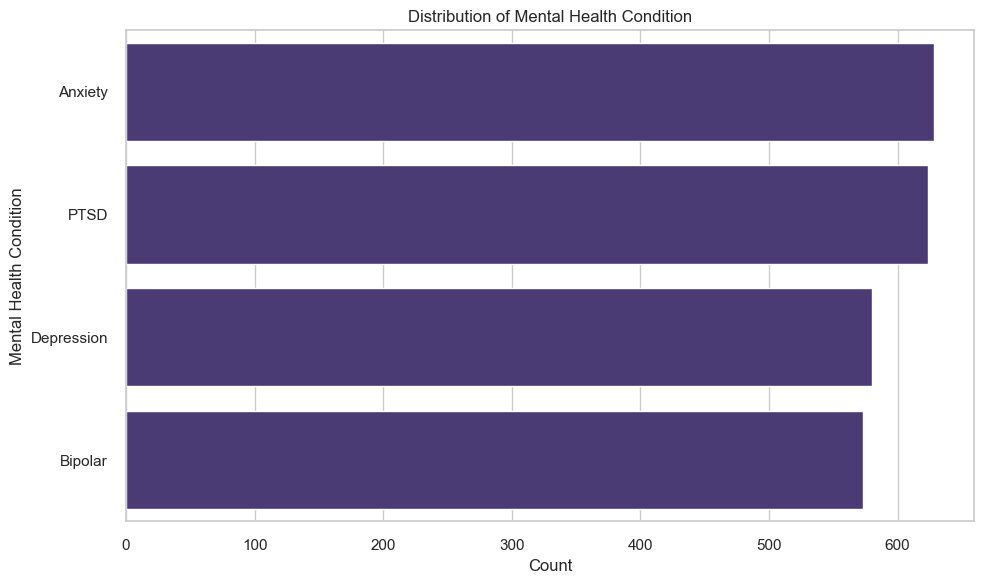

In [5]:
# Identify categorical columns
categorical_cols = ['Country', 'Gender', 'Exercise Level', 'Diet Type', 'Stress Level', 'Mental Health Condition']

# Analyze each categorical column
for col in categorical_cols:
    print(f"\n{col} unique values:")
    value_counts = df[col].value_counts()
    print(value_counts)
    
    # Plot distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[col], order=value_counts.index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

## Step 3: Analyze Numerical Variables

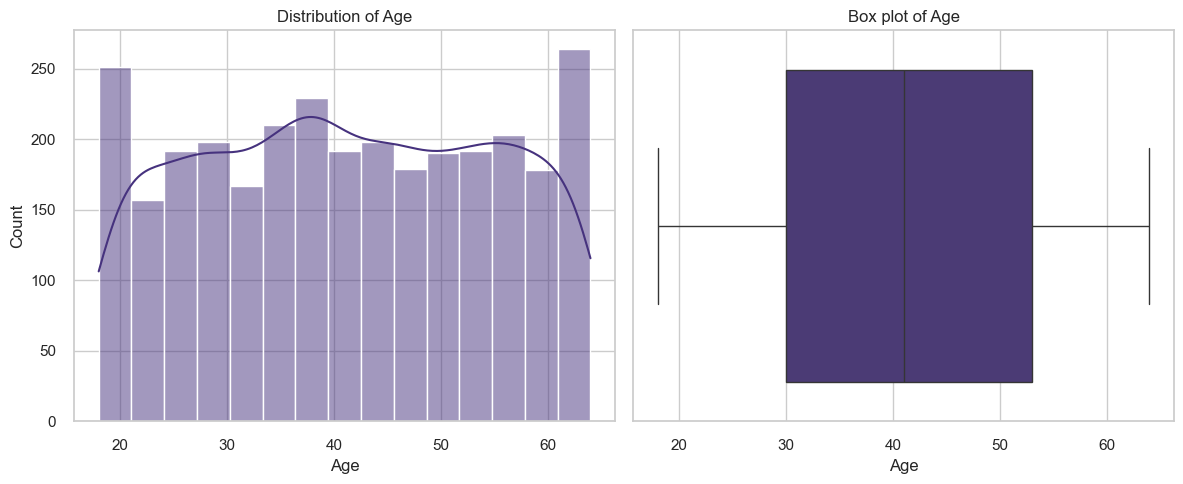


Age statistics:
count    3000.000000
mean       41.229667
std        13.428416
min        18.000000
25%        30.000000
50%        41.000000
75%        53.000000
max        64.000000
Name: Age, dtype: float64
Number of potential outliers: 0


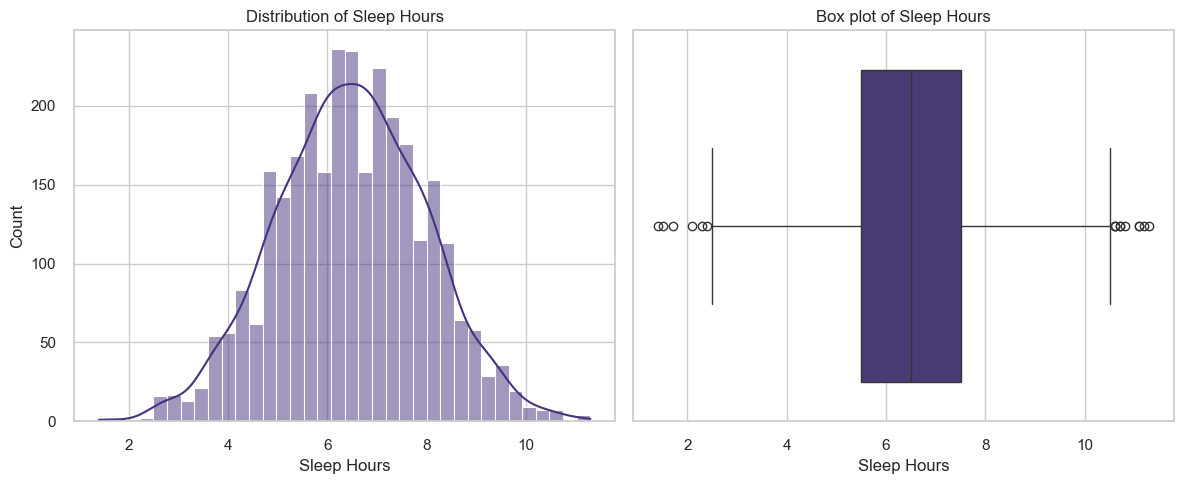


Sleep Hours statistics:
count    3000.000000
mean        6.475933
std         1.499866
min         1.400000
25%         5.500000
50%         6.500000
75%         7.500000
max        11.300000
Name: Sleep Hours, dtype: float64
Number of potential outliers: 16


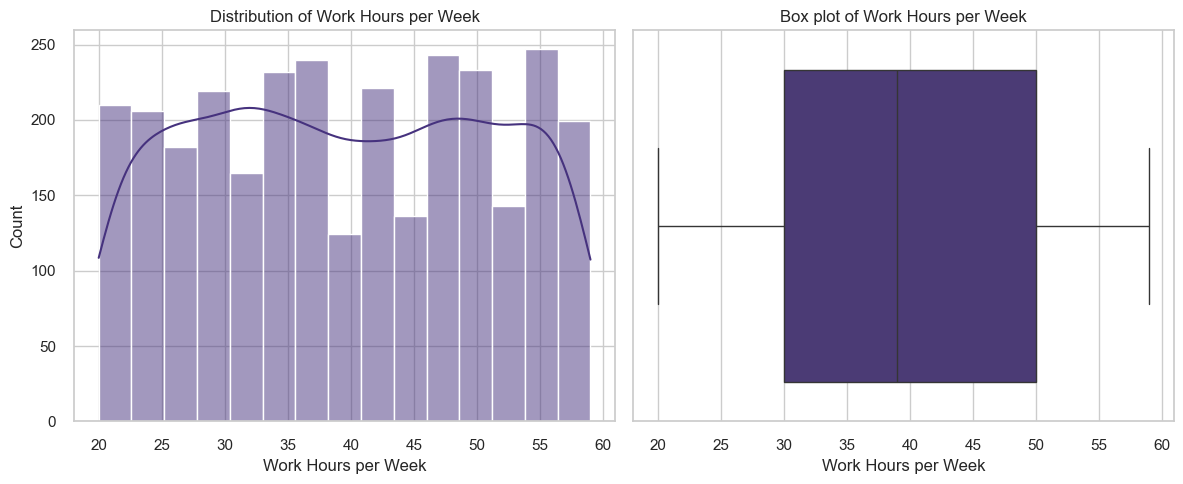


Work Hours per Week statistics:
count    3000.000000
mean       39.466333
std        11.451459
min        20.000000
25%        30.000000
50%        39.000000
75%        50.000000
max        59.000000
Name: Work Hours per Week, dtype: float64
Number of potential outliers: 0


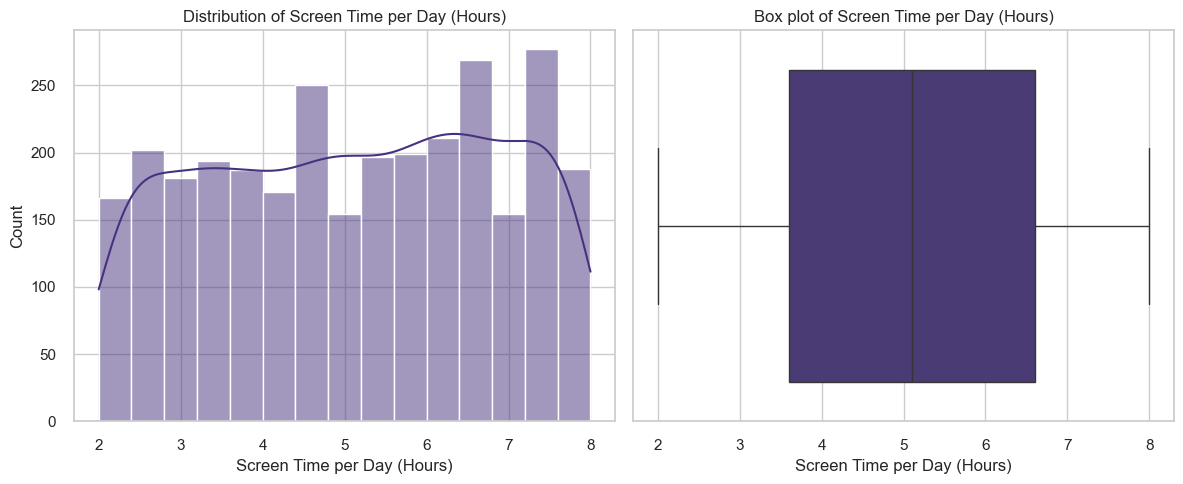


Screen Time per Day (Hours) statistics:
count    3000.000000
mean        5.089833
std         1.747231
min         2.000000
25%         3.600000
50%         5.100000
75%         6.600000
max         8.000000
Name: Screen Time per Day (Hours), dtype: float64
Number of potential outliers: 0


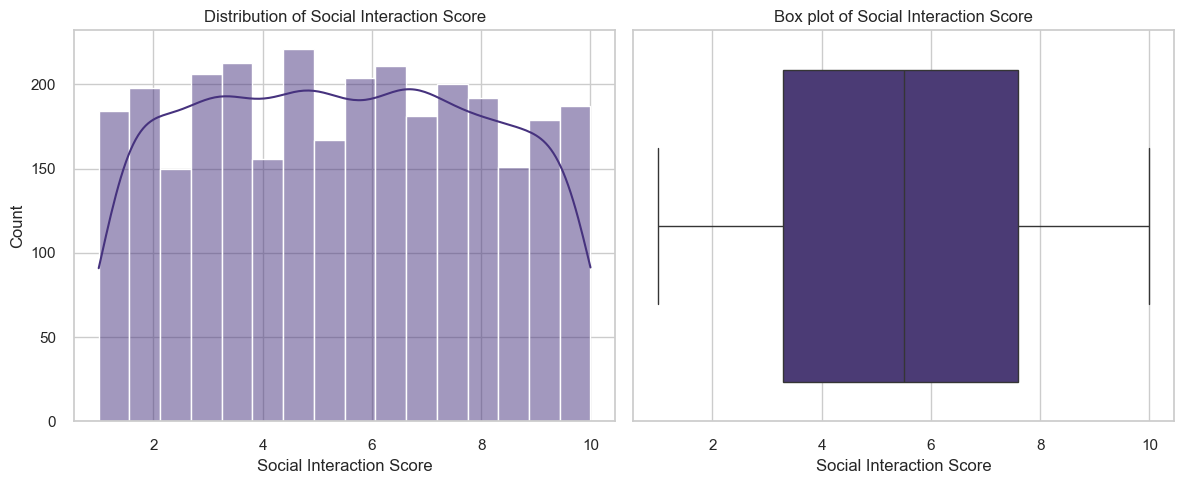


Social Interaction Score statistics:
count    3000.000000
mean        5.470200
std         2.563532
min         1.000000
25%         3.300000
50%         5.500000
75%         7.600000
max        10.000000
Name: Social Interaction Score, dtype: float64
Number of potential outliers: 0


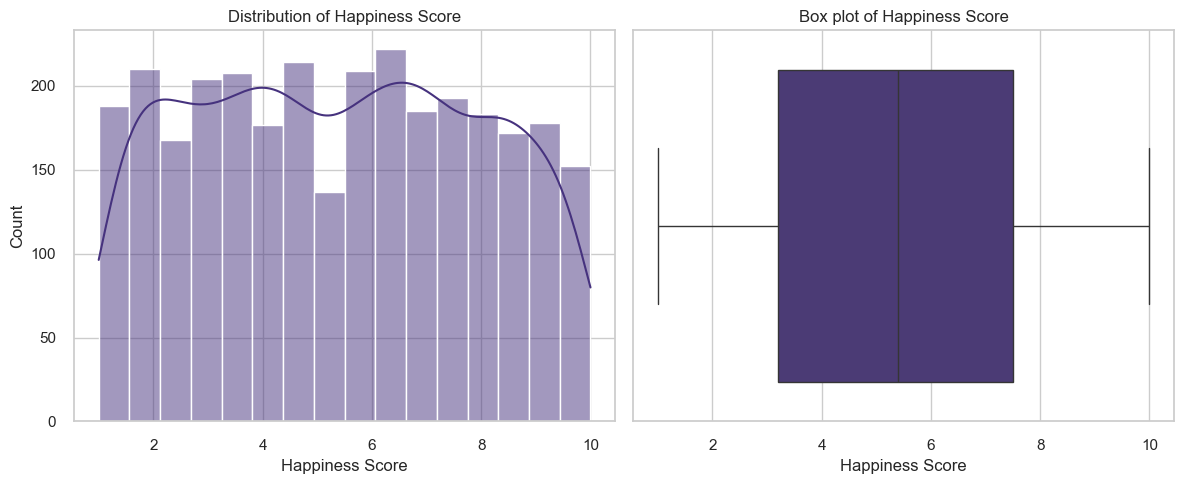


Happiness Score statistics:
count    3000.000000
mean        5.395067
std         2.557601
min         1.000000
25%         3.200000
50%         5.400000
75%         7.500000
max        10.000000
Name: Happiness Score, dtype: float64
Number of potential outliers: 0


In [6]:
# Identify numerical columns
numerical_cols = ['Age', 'Sleep Hours', 'Work Hours per Week', 'Screen Time per Day (Hours)', 
                  'Social Interaction Score', 'Happiness Score']

# Visualize distributions
for col in numerical_cols:
    plt.figure(figsize=(12, 5))
    
    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    
    plt.tight_layout()
    plt.show()
    
    # Basic statistics
    print(f"\n{col} statistics:")
    print(df[col].describe())
    
    # Check for outliers using IQR method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"Number of potential outliers: {outliers}")

## Step 4: Correlation Analysis

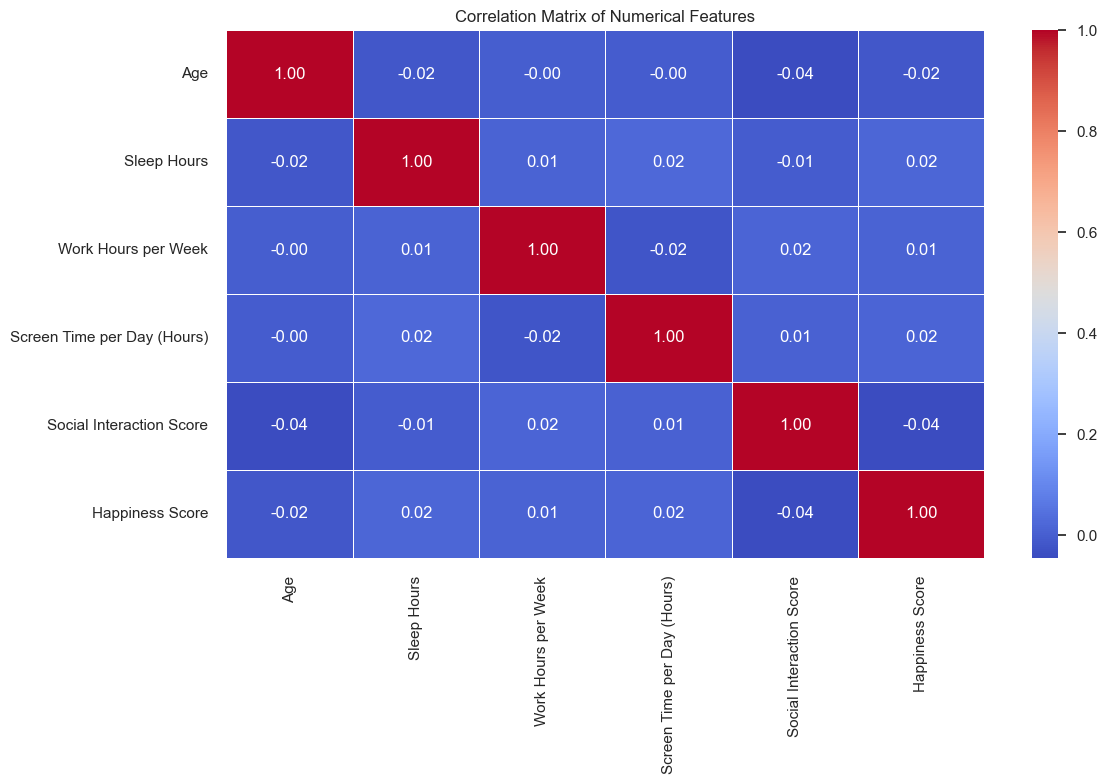

Strong correlations (above 0.5 or below -0.5):


In [7]:
# Calculate correlations between numerical variables
correlation_matrix = df[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Identify strong correlations (positive or negative)
print("Strong correlations (above 0.5 or below -0.5):")
for i, row in enumerate(correlation_matrix.index):
    for j, col in enumerate(correlation_matrix.columns):
        if i != j and abs(correlation_matrix.iloc[i, j]) > 0.5:
            print(f"{row} and {col}: {correlation_matrix.iloc[i, j]:.3f}")

## Step 5: Data Preprocessing

Now that we have explored and understood the data, let's preprocess it for modeling:
1. Create a cleaned copy
2. Handle outliers if necessary
3. Convert categorical variables to appropriate numeric representations

In [9]:
# Create a copy of the dataframe for preprocessing
df_processed = df.copy()

# Handle outliers - for this dataset, we'll identify but not remove outliers
# as they may represent legitimate data points in a health/wellness context
# We'll cap extreme values at a reasonable threshold instead

# Function to cap outliers
def cap_outliers(series, lower_limit=None, upper_limit=None):
    if lower_limit is not None:
        series = series.clip(lower=lower_limit)
    if upper_limit is not None:
        series = series.clip(upper=upper_limit)
    return series

# Apply reasonable limits based on domain knowledge
df_processed['Work Hours per Week'] = cap_outliers(df_processed['Work Hours per Week'], lower_limit=0, upper_limit=100)
df_processed['Screen Time per Day (Hours)'] = cap_outliers(df_processed['Screen Time per Day (Hours)'], lower_limit=0, upper_limit=18)
df_processed['Sleep Hours'] = cap_outliers(df_processed['Sleep Hours'], lower_limit=0, upper_limit=16)

print("After capping extreme outliers:")
print(df_processed[['Work Hours per Week', 'Screen Time per Day (Hours)', 'Sleep Hours']].describe())

After capping extreme outliers:
       Work Hours per Week  Screen Time per Day (Hours)  Sleep Hours
count          3000.000000                  3000.000000  3000.000000
mean             39.466333                     5.089833     6.475933
std              11.451459                     1.747231     1.499866
min              20.000000                     2.000000     1.400000
25%              30.000000                     3.600000     5.500000
50%              39.000000                     5.100000     6.500000
75%              50.000000                     6.600000     7.500000
max              59.000000                     8.000000    11.300000


## Step 6: Encode Categorical Variables

In [10]:
# Encode categorical variables
# 1. Exercise Level: Convert to ordinal values
exercise_mapping = {'Low': 1, 'Moderate': 2, 'High': 3}
df_processed['Exercise Level'] = df_processed['Exercise Level'].map(exercise_mapping)

# 2. Stress Level: Convert to ordinal values
stress_mapping = {'Low': 1, 'Moderate': 2, 'High': 3}
df_processed['Stress Level'] = df_processed['Stress Level'].map(stress_mapping)

# 3. Diet Type: One-hot encoding
diet_dummies = pd.get_dummies(df_processed['Diet Type'], prefix='Diet')
df_processed = pd.concat([df_processed, diet_dummies], axis=1)
# Keep original column for reference
#df_processed.drop('Diet Type', axis=1, inplace=True)

# 4. Gender: One-hot encoding
gender_dummies = pd.get_dummies(df_processed['Gender'], prefix='Gender')
df_processed = pd.concat([df_processed, gender_dummies], axis=1)
# Keep original column for reference
#df_processed.drop('Gender', axis=1, inplace=True)

# 5. Mental Health Condition: One-hot encoding
mh_dummies = pd.get_dummies(df_processed['Mental Health Condition'], prefix='MH')
df_processed = pd.concat([df_processed, mh_dummies], axis=1)
# Keep original column for reference
#df_processed.drop('Mental Health Condition', axis=1, inplace=True)

# 6. Country: One-hot encoding
country_dummies = pd.get_dummies(df_processed['Country'], prefix='Country')
df_processed = pd.concat([df_processed, country_dummies], axis=1)
# Keep original column for reference
#df_processed.drop('Country', axis=1, inplace=True)

# Display the processed dataframe
print(f"Processed dataframe shape: {df_processed.shape}")
df_processed.head()

Processed dataframe shape: (3000, 31)


,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),...,MH_Bipolar,MH_Depression,MH_PTSD,Country_Australia,Country_Brazil,Country_Canada,Country_Germany,Country_India,Country_Japan,Country_USA
0,Brazil,48,Male,1,Vegetarian,6.3,1,NaN,21,4.0,...,False,False,False,False,True,False,False,False,False,False
1,Australia,31,Male,2,Vegan,4.9,1,PTSD,48,5.2,...,False,False,True,True,False,False,False,False,False,False
2,Japan,37,Female,1,Vegetarian,7.2,3,NaN,43,4.7,...,False,False,False,False,False,False,False,False,True,False
3,Brazil,35,Male,1,Vegan,7.2,1,Depression,43,2.2,...,False,True,False,False,True,False,False,False,False,False
4,Germany,46,Male,1,Balanced,7.3,1,Anxiety,35,3.6,...,False,False,False,False,False,False,True,False,False,False


## Step 7: Feature Engineering

Create any additional features that might help with modeling.

In [11]:
# Create some new features that might be helpful

# 1. Work-Sleep Balance Ratio (higher means more work compared to sleep)
df_processed['Work_Sleep_Ratio'] = df_processed['Work Hours per Week'] / (df_processed['Sleep Hours'] * 7)

# 2. Screen-Social Balance (higher means more screen time compared to social interaction)
df_processed['Screen_Social_Ratio'] = df_processed['Screen Time per Day (Hours)'] / df_processed['Social Interaction Score']

# 3. Lifestyle Balance Score (higher is better balanced)
df_processed['Lifestyle_Balance'] = (
    df_processed['Sleep Hours'] / 8 +  # Normalized to recommended 8 hours
    (1 - df_processed['Work Hours per Week'] / 80) +  # Lower work hours is better, max at 80
    df_processed['Social Interaction Score'] / 10 +  # Normalized to 0-10 scale
    (df_processed['Exercise Level'] / 3)  # Normalized to 1-3 scale
) / 4  # Average of the four components

# Display the new features
print("\nNew engineered features:")
df_processed[['Work_Sleep_Ratio', 'Screen_Social_Ratio', 'Lifestyle_Balance']].describe()


New engineered features:


,Work_Sleep_Ratio,Screen_Social_Ratio,Lifestyle_Balance
count,3000.000000,3000.000000,3000.000000
mean,0.926772,1.290575,0.630685
std,0.387165,1.054474,0.111584
min,0.267857,0.206186,0.317083
25%,0.647056,0.622392,0.548333
50%,0.869922,0.943260,0.629583
75%,1.124477,1.532270,0.712292
max,4.857143,7.800000,0.969375


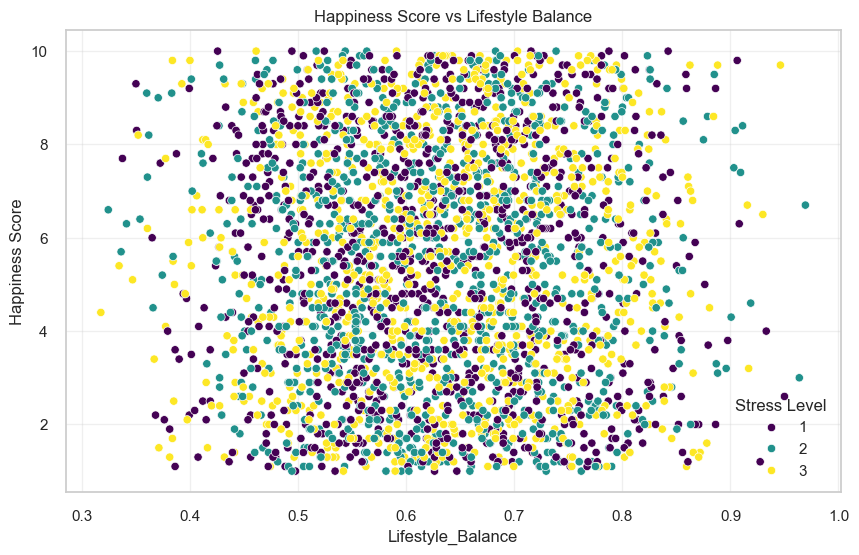

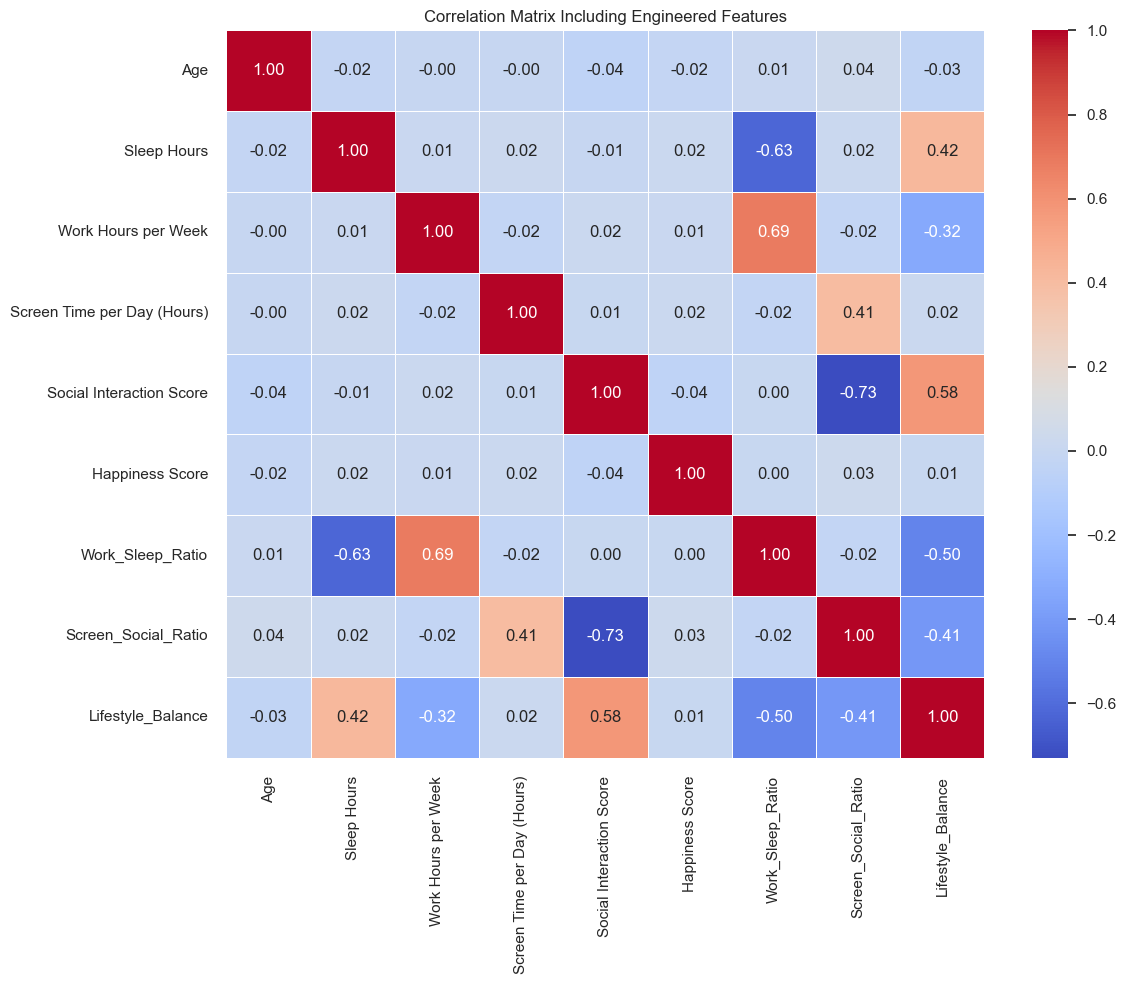

In [12]:
# Visualize relationships between new features and target variables

# Happiness Score vs Lifestyle Balance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Lifestyle_Balance', y='Happiness Score', hue='Stress Level', 
                palette='viridis', data=df_processed)
plt.title('Happiness Score vs Lifestyle Balance')
plt.grid(True, alpha=0.3)
plt.show()

# Correlation with new features
extended_numerical_cols = numerical_cols + ['Work_Sleep_Ratio', 'Screen_Social_Ratio', 'Lifestyle_Balance']
new_correlation_matrix = df_processed[extended_numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(new_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Including Engineered Features')
plt.tight_layout()
plt.show()

## Step 8: Create Processed Dataset for Modeling

Create two versions of the processed dataset:
1. With original categorical columns (for reference)
2. Model-ready version with encoded categorical variables

In [13]:
# Version 1: Reference dataset with original columns and encoded columns
reference_df = df_processed.copy()

# Version 2: Model-ready dataset (drop original categorical columns)
model_ready_df = df_processed.copy()
model_ready_df.drop(['Country', 'Gender', 'Diet Type', 'Mental Health Condition'], axis=1, inplace=True)

# Display the shapes of both datasets
print(f"Reference dataset shape: {reference_df.shape}")
print(f"Model-ready dataset shape: {model_ready_df.shape}")

# Save both datasets to CSV
reference_df.to_csv('../outputs/data/lifesync_processed_reference.csv', index=False)
model_ready_df.to_csv('../outputs/data/lifesync_processed_model_ready.csv', index=False)

print("\nDatasets saved to:")
print("- ../outputs/data/lifesync_processed_reference.csv")
print("- ../outputs/data/lifesync_processed_model_ready.csv")

Reference dataset shape: (3000, 34)
Model-ready dataset shape: (3000, 30)

Datasets saved to:
- ../outputs/data/lifesync_processed_reference.csv
- ../outputs/data/lifesync_processed_model_ready.csv

Datasets saved to:
- ../outputs/data/lifesync_processed_reference.csv
- ../outputs/data/lifesync_processed_model_ready.csv


## Step 9: Data Summary and Validation

Let's create a summary of the data processing steps and validate that our processed data is ready for modeling.

In [14]:
# Summary of data preprocessing steps
preprocessing_summary = {
    'Original Data Shape': df.shape,
    'Processed Data Shape': model_ready_df.shape,
    'Missing Values Handled': f"{df.isnull().sum().sum()} found, {model_ready_df.isnull().sum().sum()} remaining",
    'Categorical Columns Encoded': ['Country', 'Gender', 'Diet Type', 'Mental Health Condition'],
    'Ordinal Columns Mapped': ['Exercise Level', 'Stress Level'],
    'Outlier Treatment': "Capped extreme values for Work Hours, Screen Time, and Sleep Hours",
    'New Features Created': ['Work_Sleep_Ratio', 'Screen_Social_Ratio', 'Lifestyle_Balance'],
    'Target Variables': ['Happiness Score', 'Stress Level']
}

# Print summary
print("Data Preprocessing Summary:")
for key, value in preprocessing_summary.items():
    print(f"- {key}: {value}")

# Check for any remaining issues
print("\nFinal Validation Checks:")
print(f"Missing values remaining: {model_ready_df.isnull().sum().sum()}")
print(f"Duplicated rows: {model_ready_df.duplicated().sum()}")
print(f"Infinite values: {np.isinf(model_ready_df.select_dtypes(include=[np.number])).sum().sum()}")

# Data types in final dataset
print("\nData types in processed dataset:")
print(model_ready_df.dtypes.value_counts())

Data Preprocessing Summary:
- Original Data Shape: (3000, 12)
- Processed Data Shape: (3000, 30)
- Missing Values Handled: 595 found, 0 remaining
- Categorical Columns Encoded: ['Country', 'Gender', 'Diet Type', 'Mental Health Condition']
- Ordinal Columns Mapped: ['Exercise Level', 'Stress Level']
- Outlier Treatment: Capped extreme values for Work Hours, Screen Time, and Sleep Hours
- New Features Created: ['Work_Sleep_Ratio', 'Screen_Social_Ratio', 'Lifestyle_Balance']
- Target Variables: ['Happiness Score', 'Stress Level']

Final Validation Checks:
Missing values remaining: 0
Duplicated rows: 0
Infinite values: 0

Data types in processed dataset:
bool       19
float64     7
int64       4
Name: count, dtype: int64


## Conclusion

We have successfully preprocessed the LifeSync dataset, creating two versions:

1. A reference dataset that keeps original categorical columns alongside encoded versions
2. A model-ready dataset with proper encoding for machine learning

The preprocessing steps included:
- Exploring and understanding the data
- Handling outliers by capping extreme values
- Encoding categorical variables
- Creating new engineered features
- Validating the final dataset

These processed datasets are now ready for model training and evaluation, which is handled in the separate `model_training.ipynb` notebook.